In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%load_ext autoreload
%autoreload 2

import os
import tempfile
import pint

ureg = pint.UnitRegistry()
os.environ["OPENBLAS_NUM_THREADS"] = "1"

from IPython.display import HTML, display
import h5py
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 4)

import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation

c:\Users\jsche\Documents\GitHub\tdgl\.conda\Lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


### Superconductive Film

In [2]:
length_units = "nm"
# Material parameters from Petrovic
xi = 13
london_lambda = 39
d = 25
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

# Device geometry
total_width = 512
total_length = 512

# Outer geometry of the film
film = (
    tdgl.Polygon("film", points=box(total_width, total_length))
    .resample(401)
    .buffer(0)
)

# Current terminals
source = (
    tdgl.Polygon("source", points=box(1.1 * total_width, total_length / 100))
    .translate(dy=total_length / 2)
)
drain = source.scale(yfact=-1).set_name("drain")
#  Voltage measurement points
probe_points = [(0, total_length / 2.5), (0, -total_length / 2.5)]

In [3]:
device = tdgl.Device(
    "small_square", #512x512 nm
    layer=layer,
    film=film,
    terminals=[source,drain],
    probe_points=probe_points,
    length_units=length_units,
)

In [4]:
device_no_terminals = tdgl.Device(
  "small_square",
  layer=layer,
  film=film,
  length_units=length_units
)

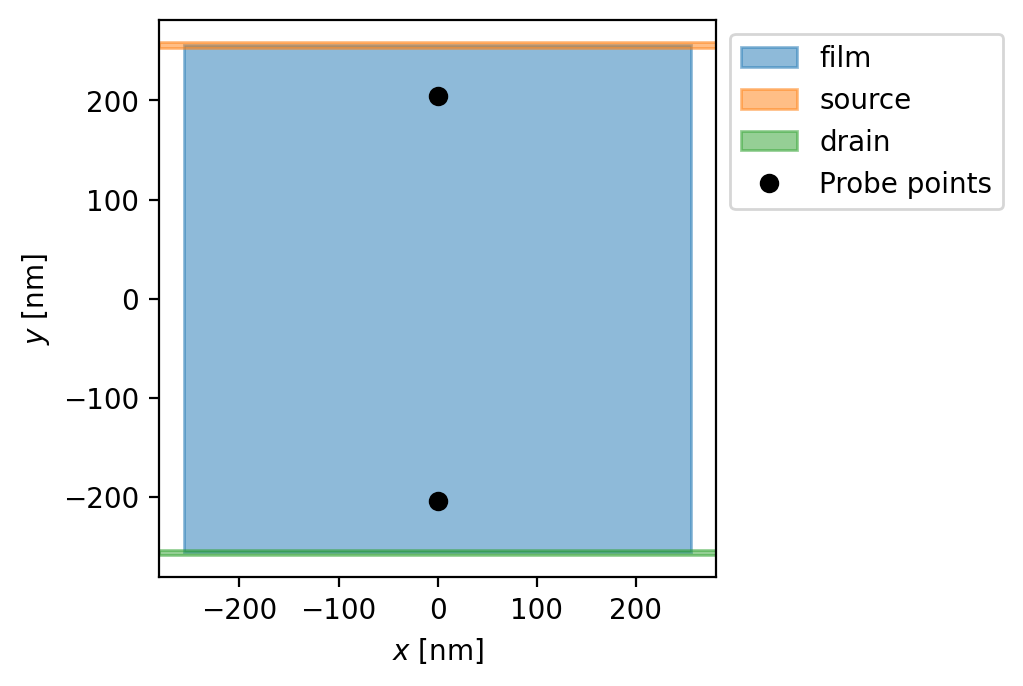

In [5]:
fig, ax = device.draw()

In [6]:
device.make_mesh(max_edge_length=xi / 2, smooth=100)
device_no_terminals.make_mesh(max_edge_length=xi / 2, smooth=100)

Constructing Voronoi polygons:   0%|          | 0/21531 [00:00<?, ?it/s]Malformed Voronoi cell surrounding boundary site 1. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 2. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 11. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 12. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 14. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a sm

In [7]:
# fig, ax = device.plot(mesh=True, legend=False)

In [8]:
# device.mesh_stats()

### Example Code

In [9]:
"""
Example code
"""

# import numpy as np

# from ..em import uniform_Bz_vector_potential, ureg
# from ..parameter import Parameter


# def constant_field_vector_potential(
#     x,
#     y,
#     z,
#     *,
#     Bz: float,
#     field_units: str = "mT",
#     length_units: str = "um",
# ):
#     if z.ndim == 0:
#         z = z * np.ones_like(x)
#     positions = np.array([x.squeeze(), y.squeeze(), z.squeeze()]).T
#     positions = (positions * ureg(length_units)).to("m").magnitude
#     Bz = Bz * ureg(field_units)
#     A = uniform_Bz_vector_potential(positions, Bz)
#     return A.to(f"{field_units} * {length_units}").magnitude


# def ConstantField(
#     value: float = 0, field_units: str = "mT", length_units: str = "um"
# ) -> Parameter:
#     """Returns a Parameter that computes a constant as a function of ``x, y, z``.
#     Args:
#         value: The constant value of the field.
#     Returns:
#         A Parameter that returns ``value`` at all ``x, y, z``.
#     """
#     return Parameter(
#         constant_field_vector_potential,
#         Bz=float(value),
#         field_units=field_units,
#         length_units=length_units,
#     )
# def uniform_Bz_vector_potential(
#     positions: np.ndarray,
#     Bz: Union[float, str, pint.Quantity],
# ) -> np.ndarray:
#     """Calculates the magnetic vector potential [Ax, Ay, Az] at ``positions``
#     due uniform magnetic field along the z-axis with strength ``Bz``.

#     Args:
#         positions: Shape (n, 3) array of (x, y, z) positions in meters at which to
#             evaluate the vector potential.
#         Bz: The strength of the uniform field, as a pint-parseable string,
#             a pint.Quantity, or a float with units of Tesla.

#     Returns:
#         Shape (n, 3) array of the vector potential [Ax, Ay, Az] at ``positions``
#         in units of Tesla * meter.
#     """
#     assert isinstance(Bz, (float, str, pint.Quantity)), type(Bz)
#     positions = np.atleast_2d(positions)
#     assert positions.shape[1] == 3, positions.shape
#     if not isinstance(positions, pint.Quantity):
#         positions = positions * ureg("meter")
#     if isinstance(Bz, str):
#         Bz = ureg(Bz)
#     if isinstance(Bz, float):
#         Bz = Bz * ureg("tesla")
#     xs = positions[:, 0]
#     ys = positions[:, 1]
#     dx = np.ptp(xs)
#     dy = np.ptp(ys)
#     xs = xs - (xs.min() + dx / 2)
#     ys = ys - (ys.min() + dy / 2)
#     Ax = -Bz * ys / 2
#     Ay = Bz * xs / 2
#     A = np.stack([Ax, Ay, np.zeros_like(Ax)], axis=1)
#     return A.to("tesla * meter")

#  self.dynamic_vector_potential = (
#             isinstance(applied_vector_potential, Parameter)
#             and applied_vector_potential.time_dependent
#         )
#         if not callable(applied_vector_potential):
#             applied_vector_potential = ConstantField(
#                 applied_vector_potential,
#                 field_units=field_units,
#                 length_units=device.length_units,
#             )
#         self.applied_vector_potential = applied_vector_potential
#         # Evaluate the vector potential
#         self.A_scale = (
#             (ureg(field_units) * length_units / (Bc2 * xi * length_units))
#             .to_base_units()
#             .magnitude
#         )
#         A_kwargs = dict(t=0) if self.dynamic_vector_potential else dict()
#         current_A_applied = self.applied_vector_potential(
#             self.edge_centers[:, 0], self.edge_centers[:, 1], self.z0, **A_kwargs
#         )
#         current_A_applied = self.A_scale * np.asarray(current_A_applied)[:, :2]
#         if current_A_applied.shape != self.edge_centers.shape:
#             raise ValueError(
#                 f"Unexpected shape for vector_potential: {current_A_applied.shape}."
#             )

'\nExample code\n'

### Vector potential calculation

In [10]:
# """
# Vector potential calcuations
# """
# from scipy import interpolate
# from tdgl import Parameter
# CURRENT_DIRECTORY = os.getcwd()
# DATA_AND_LAYER_NAME = "B_demag_125mT_0K_layer2"
# DEMAG_B_Z_FILEPATH = os.path.join(CURRENT_DIRECTORY, "mumax_fields", "%s_z.npy" % DATA_AND_LAYER_NAME)
# DEMAG_B_Z = np.load(DEMAG_B_Z_FILEPATH)
# APPLIED_B_Z = 0.125
# B_Z = DEMAG_B_Z + APPLIED_B_Z
# # B_Z = np.reshape(B_Z, (np.shape(B_Z)[0] * np.shape(B_Z)[1], 1))

# def textured_vector_potential(
#     positions,
#     Bz,
# ):
#     """
#     Calculates the magnetic vector potential [Ax, Ay, Az] at ``positions``
#     due uniform magnetic field along the z-axis with strength ``Bz``.

#     Args:
#     positions: Shape (n, 3) array of (x, y, z) positions in meters at which to
#         evaluate the vector potential.
#     Bz: The strength of the the field with shape (m, m) with units of Tesla, where
#     m is the size of the Mumax simulation

#     Returns:
#     Shape (n, 3) array of the vector potential [Ax, Ay, Az] at ``positions``
#     in units of Tesla * meter.

#     """
#     # assert isinstance(Bz, (float, str, pint.Quantity)), type(Bz)
#     # positions = np.atleast_2d(positions)
#     # assert positions.shape[1] == 3, positions.shape
#     # if not isinstance(positions, pint.Quantity):
#     #     positions = positions * ureg("meter")
#     # if isinstance(Bz, str):
#     #     Bz = ureg(Bz)
#     # if isinstance(Bz, float):
#     #     Bz = Bz * ureg("tesla")


#     # Assuming 'positions' is already defined as in the previous example
#     # Extract the x and y values from the positions array

#     xy_vals = positions[:, :2]
    
#     # Calculate the range (peak-to-peak) of x and y values
#     dx = np.ptp(xy_vals[:, 0])
#     dy = np.ptp(xy_vals[:, 1])
#     # Calculate the center point for x and y
#     center_x = np.min(xy_vals[:, 0]) + dx / 2
#     center_y = np.min(xy_vals[:, 1]) + dy / 2
#     center = np.array([center_x, center_y])
#     # Subtract the center point from all xy values to center the data
#     xy_vals_centered = xy_vals - center
#     centered_xs = xy_vals_centered[:, 0]
#     centered_ys = xy_vals_centered[:, 1]
#     # make a grid equally sized as the positions but with spacings equivalent to the Mumax mesh
#     grid_xs = np.linspace(centered_xs.min(), centered_xs.max(), np.shape(Bz)[0])
#     grid_ys = np.linspace(centered_ys.min(), centered_ys.max(), np.shape(Bz)[1])
#     X,Y = np.meshgrid(grid_xs, grid_ys)
#     Bz_points = np.vstack([X.ravel(), Y.ravel()]).T
    
#     # reshape Bz from 128x128 in Mumax into 128^2 by 2
#     flattened_Bz_values = np.reshape(Bz, (np.shape(Bz)[0] * np.shape(Bz)[1], 1))

#     # interpolate to find Bz at positions
#     interpolated_Bz = interpolate.griddata(Bz_points, flattened_Bz_values, xy_vals_centered)
#     interpolated_Bz = interpolated_Bz*ureg("tesla")
#     centered_ys = centered_ys*ureg("meter")
#     centered_xs = centered_xs*ureg("meter")

#     # x-y component of vector potential
#     Axy = interpolated_Bz * np.stack([centered_ys, -1*centered_ys], axis=1)
    
#     A = np.hstack([Axy, np.zeros_like(Axy[:,:1])])
    
#     A = A.to("tesla * meter")
    
#     return A

# def FM_field_vector_potential(
#     x,
#     y,
#     z,
#     *,
#     field_units: str = "T",
#     length_units: str = "um",
# ):
#     if z.ndim == 0:
#         z = z * np.ones_like(x)
#     positions = np.array([x.squeeze(), y.squeeze(), z.squeeze()]).T
#     positions = (positions * ureg(length_units)).to("m").magnitude
#     Bz = B_Z * ureg(field_units)
#     A = textured_vector_potential(positions, Bz)
#     return A.to(f"{field_units} * {length_units}").magnitude

# def FMField(
#     field_units: str = "T", length_units: str = "um"
# ) -> Parameter:
#     """Returns a Parameter that computes a constant as a function of ``x, y, z``.
#     Args:
#         value: The constant value of the field.
#     Returns:
#         A Parameter that returns ``value`` at all ``x, y, z``.
#     """
#     return Parameter(
#         FM_field_vector_potential,
#         field_units=field_units,
#         length_units=length_units,
#     )


In [27]:
options = tdgl.SolverOptions(
    solve_time=800,
    output_file=os.path.join(r"C:\Users\jsche\Documents\GitHub\tdgl\tdgl_results", "75mT_with_current.h5"),
    field_units="T",
    current_units="uA",
)
from fmfield_z import FMField

RAMP_FIELD = True

# if RAMP_FIELD:
#     from tdgl.sources import LinearRamp
#     # Ramp the applied field from 0 to 0.4 mT between t=0 and t=100, then hold it at 0.4 mT.
#     applied_vector_potential = (
#         LinearRamp(tmin=0, tmax=100)
#         * FMField()
#     )
# else:
#     # If applied_vector_potential is given as a single number,
#     # it is interpreted to mean the vector potential associated with a
#     # uniform out-of-plane magnetic field with the specified strength.
#     # This is simply shorthand for
#     # ConstantField(0.4, field_units=options.field_units, length_units=device.length_units).
#     applied_vector_potential = FMField()

mumax_solution = tdgl.solve(
    device,
    options,
    applied_vector_potential=FMField(),
    terminal_currents=dict(source=12, drain=-12)
)


c:\Users\jsche\Documents\GitHub\tdgl\.conda\Lib\site-packages\scipy\interpolate\_ndgriddata.py:264: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ip = LinearNDInterpolator(points, values, fill_value=fill_value,
Output file already exists. Renaming to C:\Users\jsche\Documents\GitHub\tdgl\tdgl_results\75mT_with_current-2.h5.
Simulating: 100%|█████████▉| 800/800 [11:52<00:00,  1.12tau/s ]


### FM Solution

### Modifications to plot_order_parameter
Adding overlay with magnetization outline

In [18]:
from typing import Dict, List, Literal, Optional, Sequence, Tuple, Union

def plot_order_parameter(
    outline_filename,
    solution,
    squared: bool = False,
    mag_cmap: str = "viridis",
    phase_cmap: str = "twilight_shifted",
    shading: str = "gouraud",
    **kwargs,
) -> Tuple[plt.Figure, Sequence[plt.Axes]]:
    """Plots the magnitude (or the magnitude squared) and
    phase of the complex order parameter, :math:`\\psi=|\\psi|e^{i\\theta}`.

    .. seealso:

        :meth:`tdgl.Solution.plot_order_parameter`

    Args:
        solution: The solution for which to plot the order parameter.
        squared: Whether to plot the magnitude squared, :math:`|\\psi|^2`.
        mag_cmap: Name of the colormap to use for the magnitude.
        phase_cmap: Name of the colormap to use for the phase.
        shading: May be ``"flat"`` or ``"gouraud"``. The latter does some interpolation.

    Returns:
        matplotlib Figure and an array of two Axes objects.
    """
    m_outline = np.load(outline_filename)
    
    kwargs.setdefault("figsize", (8, 3))
    kwargs.setdefault("constrained_layout", True)
    device = solution.device
    psi = solution.tdgl_data.psi
    mag = np.abs(psi)
    psi_label = "$|\\psi|$"
    if squared:
        mag = mag**2
        psi_label = "$|\\psi|^2$"
    phase = np.angle(psi) / np.pi
    points = device.points
    triangles = device.triangles
    fig, axes = plt.subplots(1, 2, **kwargs)
    im = axes[0].tripcolor(
        points[:, 0],
        points[:, 1],
        mag,
        triangles=triangles,
        vmin=0,
        vmax=1,
        cmap=mag_cmap,
        shading=shading,
    )
    # axes[0].imshow(m_outline, 
    #                cmap='gray', 
    #                alpha=0.5, 
    #                extent=[points[:, 0].min(), points[:, 0].max(), points[:, 1].min(), points[:, 1].max()]
    #                )
    X, Y = np.meshgrid(np.linspace(points[:, 0].min(), points[:, 0].max(), m_outline.shape[1]), np.linspace(points[:, 1].max(), points[:, 1].min(), m_outline.shape[0]))
    axes[0].contour(X, Y, m_outline, colors='red', alpha=0.15)
    
    cbar = fig.colorbar(im, ax=axes[0])
    cbar.set_label(psi_label)
    im = axes[1].tripcolor(
        points[:, 0],
        points[:, 1],
        phase,
        triangles=triangles,
        vmin=-1,
        vmax=1,
        cmap=phase_cmap,
        shading=shading,
    )
    axes[1].contour(X, Y, m_outline, colors='red', alpha=0.15)
    cbar = fig.colorbar(im, ax=axes[1])
    cbar.set_label("$\\theta / \\pi$")
    length_units = device.ureg(device.length_units).units
    for ax in axes:
        ax.set_aspect("equal")
        ax.set_xlabel(f"$x$ [${length_units:~L}$]")
        ax.set_ylabel(f"$y$ [${length_units:~L}$]")
    return fig, axes

### Plots Below

[-0.0074126708349678055 -0.007388704504030523 -0.007441262395470631 ... 0.05659752375257866 0.02612536649920301 0.017137706328534417] tesla


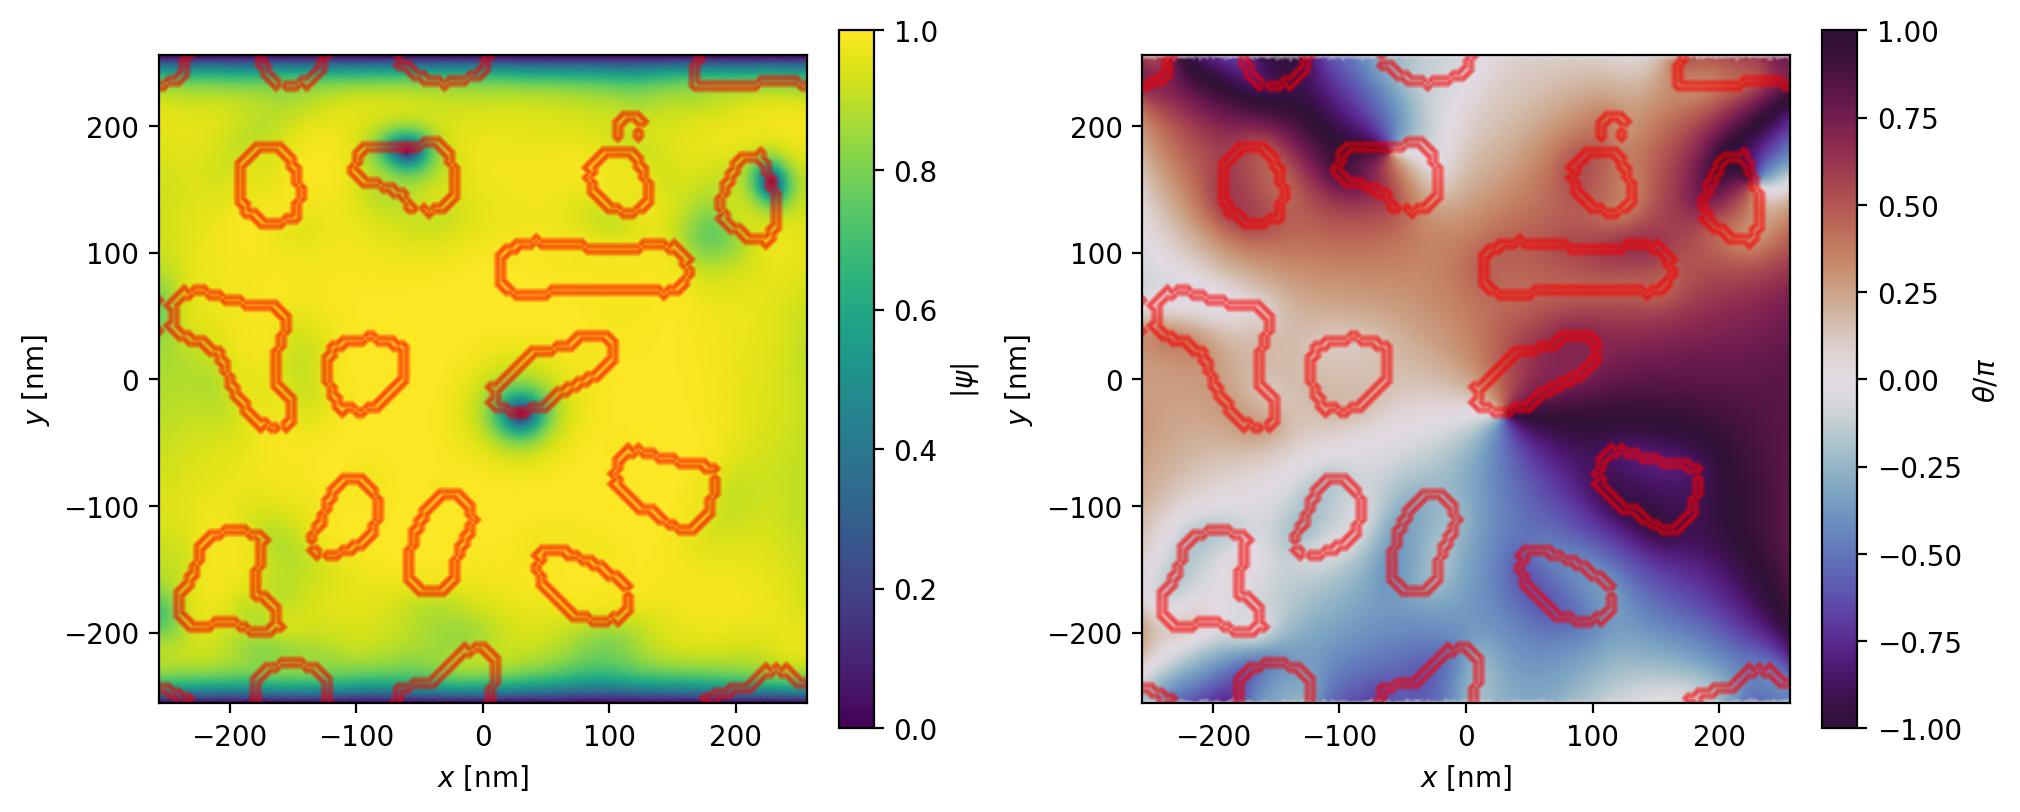

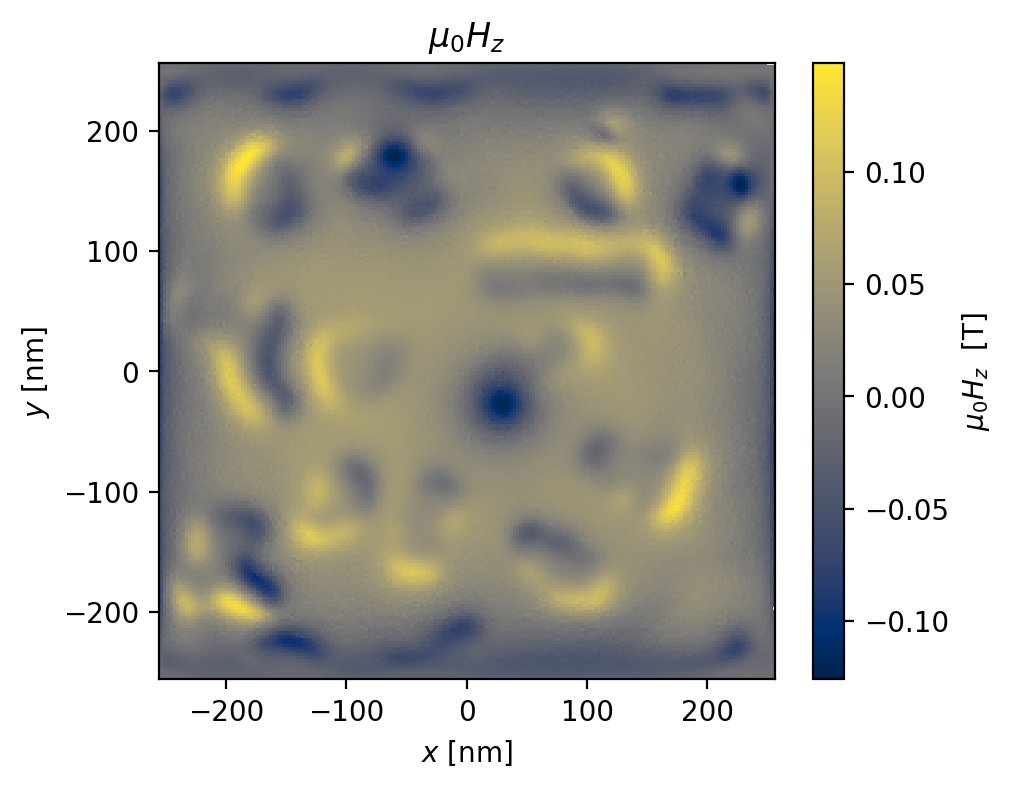

In [29]:
mumax_solution = tdgl.Solution.from_hdf5(r"C:\Users\jsche\Documents\GitHub\tdgl\tdgl_results\75mT_with_current-2.h5")
m_outline_filename = r"C:\Users\jsche\Documents\GitHub\tdgl\mumax_m_outlines\m_75mT_layer1_outline.npy"
fig, axes   = plot_order_parameter(m_outline_filename, mumax_solution, figsize=(10, 4))
edge_centers = xi * device_no_terminals.mesh.edge_mesh.centers
x = edge_centers[:,0]
y = edge_centers[:,1]
z0 = (device.layer.z0+1) * np.ones(len(edge_centers), dtype=float)
positions = np.array([x.squeeze(), y.squeeze(), z0.squeeze()]).T
fig,axes = mumax_solution.plot_field_at_positions(positions)
print(mumax_solution.field_at_position(positions))


In [ ]:
print(np.shape(device.mesh.edge_mesh.edges))
print(np.shape(device.mesh.sites))


AttributeError: 'NoneType' object has no attribute 'edge_mesh'

More example code below for run

In [ ]:
# options = tdgl.SolverOptions(
#     solve_time=200,
#     output_file=os.path.join("C:\Users\jsche\Documents\GitHub\tdgl\tdgl_results", "skyrmions_please.h5"),
#     field_units="T",
#     current_units="uA",
# )

# RAMP_FIELD = True

# if RAMP_FIELD:
#     from tdgl.sources import LinearRamp, ConstantField

#     # Ramp the applied field from 0 to 0.4 mT between t=0 and t=100, then hold it at 0.4 mT.
#     applied_vector_potential = (
#         LinearRamp(tmin=0, tmax=100)
#         * ConstantField(25, field_units=options.field_units, length_units=device.length_units)
#     )
# else:
#     # If applied_vector_potential is given as a single number,
#     # it is interpreted to mean the vector potential associated with a
#     # uniform out-of-plane magnetic field with the specified strength.
#     # This is simply shorthand for
#     # ConstantField(0.4, field_units=options.field_units, length_units=device.length_units).
#     applied_vector_potential = 25

# field_current_solution = tdgl.solve(
#     device_no_terminals,
#     options,
#     applied_vector_potential=applied_vector_potential,
#     # terminal_currents=dict(source=12, drain=-12),
#     #The seed solution will be used as the initial state of the film.
# )

Output file already exists. Renaming to tdgl_results\skyrmions_please-4.h5.
Simulating:   1%|          | 2/200 [00:32<54:01, 16.37s/tau ]  


### Modifications to animate
Magnetization outline

In [24]:
# create_animation code block
import logging
import os
from contextlib import nullcontext
from logging import Logger
from typing import Any, Dict, Literal, Optional, Sequence, Tuple, Union

import h5py
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
from tqdm import tqdm

from tdgl.device.device import Device
from tdgl.solution.data import get_data_range
from tdgl.visualization.common import DEFAULT_QUANTITIES, PLOT_DEFAULTS, Quantity, auto_grid
from tdgl.visualization.io import get_plot_data, get_state_string


def create_animation(
    input_file: Union[str, h5py.File],
    m_outline_filename,
    *,
    output_file: Optional[str] = None,
    quantities: Union[str, Sequence[str]] = DEFAULT_QUANTITIES,
    shading: Literal["flat", "gouraud"] = "gouraud",
    fps: int = 30,
    dpi: float = 100,
    max_cols: int = 4,
    min_frame: int = 0,
    max_frame: int = -1,
    autoscale: bool = False,
    dimensionless: bool = False,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    axis_labels: bool = False,
    axes_off: bool = False,
    title_off: bool = False,
    full_title: bool = True,
    logger: Optional[Logger] = None,
    figure_kwargs: Optional[Dict[str, Any]] = None,
    writer: Union[str, animation.MovieWriter, None] = None,
) -> animation.FuncAnimation:
    """Generates, and optionally saves, and animation of a TDGL simulation.

    Args:
        input_file: An open h5py file or a path to an H5 file containing
            the :class:`tdgl.Solution` you would like to animate.
        output_file: A path to which to save the animation,
            e.g., as a gif or mp4 video.
        quantities: The names of the quantities to animate.
        shading: Shading method, "flat" or "gouraud". See matplotlib.pyplot.tripcolor.
        fps: Frame rate in frames per second.
        dpi: Resolution in dots per inch.
        max_cols: The maxiumum number of columns in the subplot grid.
        min_frame: The first frame of the animation.
        max_frame: The last frame of the animation.
        autoscale: Autoscale colorbar limits at each frame.
        dimensionless: Use dimensionless units for axes
        xlim: x-axis limits
        ylim: y-axis limits
        axes_off: Turn off the axes for each subplot.
        title_off: Turn off the figure suptitle.
        full_title: Include the full "state" for each frame in the figure suptitle.
        figure_kwargs: Keyword arguments passed to ``plt.subplots()`` when creating
            the figure.
        writer: A :class:`matplotlib.animation.MovieWriter` instance to use when
            saving the animation.
        logger: A logger instance to use.

    Returns:
        The animation as a :class:`matplotlib.animation.FuncAnimation`.
    """
    if isinstance(input_file, str):
        input_file = input_file
    if quantities is None:
        quantities = Quantity.get_keys()
    if isinstance(quantities, str):
        quantities = [quantities]
    quantities = [Quantity.from_key(name.upper()) for name in quantities]
    num_plots = len(quantities)
    logger = logger or logging.getLogger()
    figure_kwargs = figure_kwargs or dict()
    figure_kwargs.setdefault("constrained_layout", True)
    default_figsize = (
        3.25 * min(max_cols, num_plots),
        2.5 * max(1, num_plots // max_cols),
    )
    figure_kwargs.setdefault("figsize", default_figsize)
    figure_kwargs.setdefault("sharex", True)
    figure_kwargs.setdefault("sharey", True)

    logger.info(f"Creating animation for {[obs.name for obs in quantities]!r}.")

    mpl_context = nullcontext() if output_file is None else plt.ioff()
    if isinstance(input_file, str):
        h5_context = h5py.File(input_file, "r")
    else:
        h5_context = nullcontext(input_file)

    with h5_context as h5file:
        with mpl_context:
            device = Device.from_hdf5(h5file["solution/device"])
            mesh = device.mesh
            if dimensionless:
                scale = 1
                units_str = "\\xi"
            else:
                scale = device.layer.coherence_length
                units_str = f"{device.ureg(device.length_units).units:~L}"
            x, y = scale * mesh.sites.T

            # Get the ranges for the frame
            _min_frame, _max_frame = get_data_range(h5file)
            min_frame = max(min_frame, _min_frame)
            if max_frame == -1:
                max_frame = _max_frame
            else:
                max_frame = min(max_frame, _max_frame)

            # Temp data to use in plots
            temp_value = np.ones(len(mesh.sites), dtype=float)
            temp_value[0] = 0
            temp_value[1] = 0.5

            fig, axes = auto_grid(num_plots, max_cols=max_cols, **figure_kwargs)
            collections = []
            for quantity, ax in zip(quantities, axes.flat):
                ax: plt.Axes
                opts = PLOT_DEFAULTS[quantity]
                collection = ax.tripcolor(
                    x,
                    y,
                    temp_value,
                    triangles=mesh.elements,
                    shading=shading,
                    cmap=opts.cmap,
                    vmin=opts.vmin,
                    vmax=opts.vmax,
                )
                cbar = fig.colorbar(collection, ax=ax)
                cbar.set_label(opts.clabel)
                ax.set_aspect("equal")
                ax.set_title(quantity.value)
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                if axes_off:
                    ax.axis("off")
                if axis_labels:
                    ax.set_xlabel(f"$x$ [${units_str}$]")
                    ax.set_ylabel(f"$y$ [${units_str}$]")
                collections.append(collection)

            vmins = [+np.inf for _ in quantities]
            vmaxs = [-np.inf for _ in quantities]

            def update(frame):
                if not h5file:
                    return
                frame += min_frame
                state = get_state_string(h5file, frame, max_frame)
                if not full_title:
                    state = state.split(",")[0]
                if not title_off:
                    fig.suptitle(state)
                for i, (quantity, collection) in enumerate(
                    zip(quantities, collections)
                ):
                    opts = PLOT_DEFAULTS[quantity]
                    values, direction, _ = get_plot_data(h5file, mesh, quantity, frame)
                    mask = np.abs(values - np.mean(values)) <= 6 * np.std(values)
                    if opts.vmin is None:
                        if autoscale:
                            vmins[i] = np.min(values[mask])
                        else:
                            vmins[i] = min(vmins[i], np.min(values[mask]))
                    else:
                        vmins[i] = opts.vmin
                    if opts.vmax is None:
                        if autoscale:
                            vmaxs[i] = np.max(values[mask])
                        else:
                            vmaxs[i] = max(vmaxs[i], np.max(values[mask]))
                    else:
                        vmaxs[i] = opts.vmax
                    if opts.symmetric:
                        vmax = max(abs(vmins[i]), abs(vmaxs[i]))
                        vmaxs[i] = vmax
                        vmins[i] = -vmax
                    if shading == "flat":
                        # https://stackoverflow.com/questions/40492511/set-array-in-tripcolor-bug
                        values = values[mesh.elements].mean(axis=1)
                    collection.set_array(values)
                    collection.set_clim(vmins[i], vmaxs[i])
                
                m_outline = np.load(m_outline_filename)
                X, Y = np.meshgrid(np.linspace(x.min(), x.max(), m_outline.shape[1]), np.linspace(y.max(), y.min(), m_outline.shape[0]))
                if frame == min_frame:
                    for ax in axes:
                        ax.contour(X, Y, m_outline, colors='red', alpha=0.15)
                fig.canvas.draw()

            anim = animation.FuncAnimation(
                fig,
                update,
                frames=max_frame - min_frame,
                interval=1e3 / fps,
                blit=False,
            )

        if output_file is not None:
            output_file = os.path.join(os.getcwd(), output_file)
            if writer is None:
                kwargs = dict(fps=fps)
            else:
                kwargs = dict(writer=writer)
            fname = os.path.basename(output_file)
            with tqdm(
                total=len(range(min_frame, max_frame)),
                unit="frames",
                desc=f"Saving to {fname}",
            ) as pbar:
                anim.save(
                    output_file,
                    dpi=dpi,
                    progress_callback=lambda frame, total: pbar.update(1),
                    **kwargs,
                )

        return anim


In [25]:
def make_video_from_solution(
    solution,
    m_outline_filename,
    quantities=("order_parameter", "phase"),
    fps=20,
    figsize=(5, 4),
):
    """Generates an HTML5 video from a tdgl.Solution."""
    with tdgl.non_gui_backend():
        with h5py.File(solution.path, "r") as h5file:
            anim = create_animation(
                h5file,
                m_outline_filename=m_outline_filename,
                quantities=quantities,
                fps=fps,
                figure_kwargs=dict(figsize=figsize),
            )
            video = anim.to_html5_video()
        return HTML(video)

In [30]:
MAKE_ANIMATIONS=True
if MAKE_ANIMATIONS:
    mumax_FM_field_video = make_video_from_solution(
        mumax_solution,
        m_outline_filename,
        quantities=["order_parameter", "phase"],
        figsize=(6.5, 4),
    )
    display(mumax_FM_field_video)